# Exercises

In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load the data
data = pd.read_csv('../data/micro_world.csv', engine='python')

## AVERAGE. Create a bar chart of top 10 countries in terms of % of females with debit card.

In [16]:
female_df = data[data['female']==2]
male_df = data[data['female']==1]

In [17]:
female_df['has_debit_card'] = female_df['fin2'].apply(
    lambda x:1 if x == 1 else 0
)

female_grouped_data = female_df.groupby(['economy', 'economycode', 'regionwb']).agg(
    total_debit_owners=('has_debit_card', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

female_grouped_data['percent of females with debit card'] = female_grouped_data['total_debit_owners'] * 100.0 / female_grouped_data['total_population']

female_top_10 = female_grouped_data.sort_values('percent of females with debit card', ascending=False).head(10).reset_index(drop=True)

female_worst_10 = female_grouped_data.sort_values('percent of females with debit card', ascending=False).tail(10).reset_index(drop=True)

male_df['has_debit_card'] = male_df['fin2'].apply(
    lambda x:1 if x == 1 else 0
)

male_grouped_data = male_df.groupby(['economy', 'economycode', 'regionwb']).agg(
    total_debit_owners=('has_debit_card', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

male_grouped_data['percent of males with debit card'] = male_grouped_data['total_debit_owners'] * 100.0 / male_grouped_data['total_population']

male_top_10 = male_grouped_data.sort_values('percent of males with debit card', ascending=False).head(10).reset_index(drop=True)

male_worst_10 = male_grouped_data.sort_values('percent of males with debit card', ascending=False).tail(10).reset_index(drop=True)

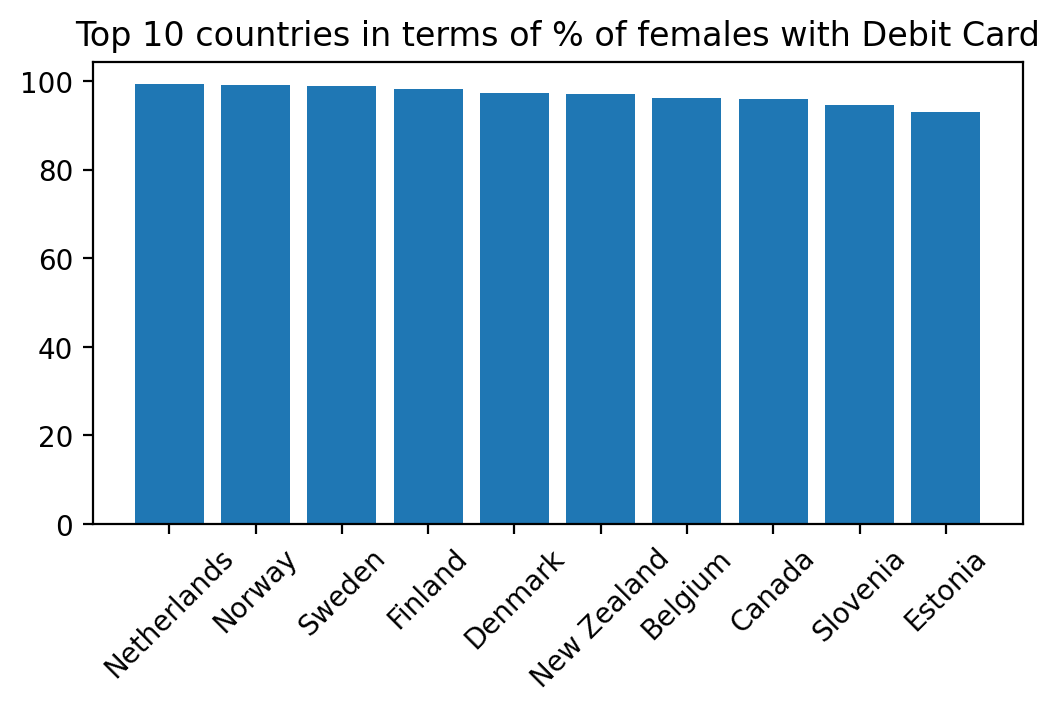

In [18]:
plt.figure(figsize=(6,3)  , dpi=200)
plt.bar(
    female_top_10['economy'],
    female_top_10['percent of females with debit card']
)
plt.title("Top 10 countries in terms of % of females with Debit Card")
plt.xticks(rotation=45)
plt.show()

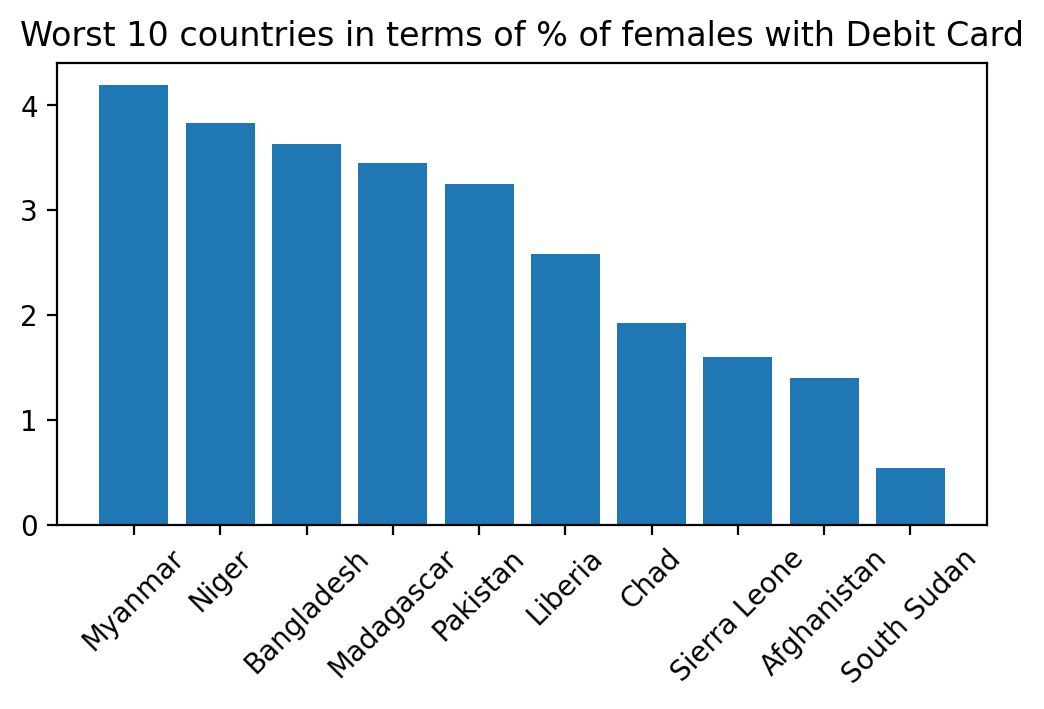

In [19]:
plt.figure(figsize=(6,3)  , dpi=200)
plt.bar(
    female_worst_10['economy'],
    female_worst_10['percent of females with debit card']
)
plt.title("Worst 10 countries in terms of % of females with Debit Card")
plt.xticks(rotation=45)
plt.show()

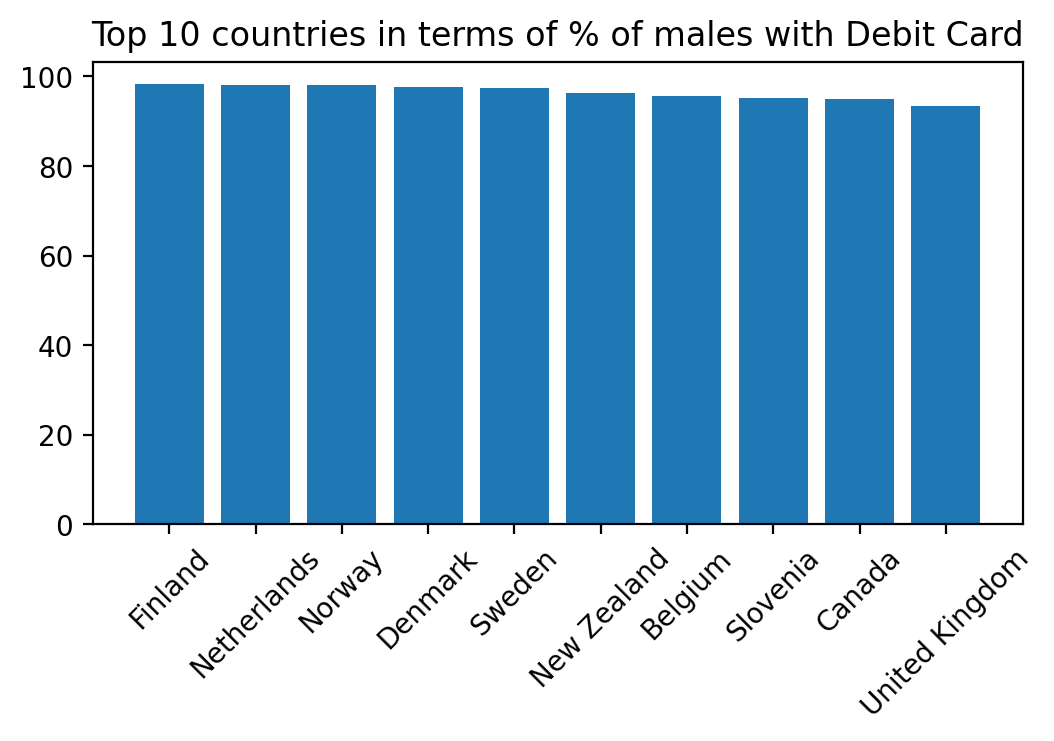

In [20]:
plt.figure(figsize=(6,3)  , dpi=200)
plt.bar(
    male_top_10['economy'],
    male_top_10['percent of males with debit card']
)
plt.title("Top 10 countries in terms of % of males with Debit Card")
plt.xticks(rotation=45)
plt.show()

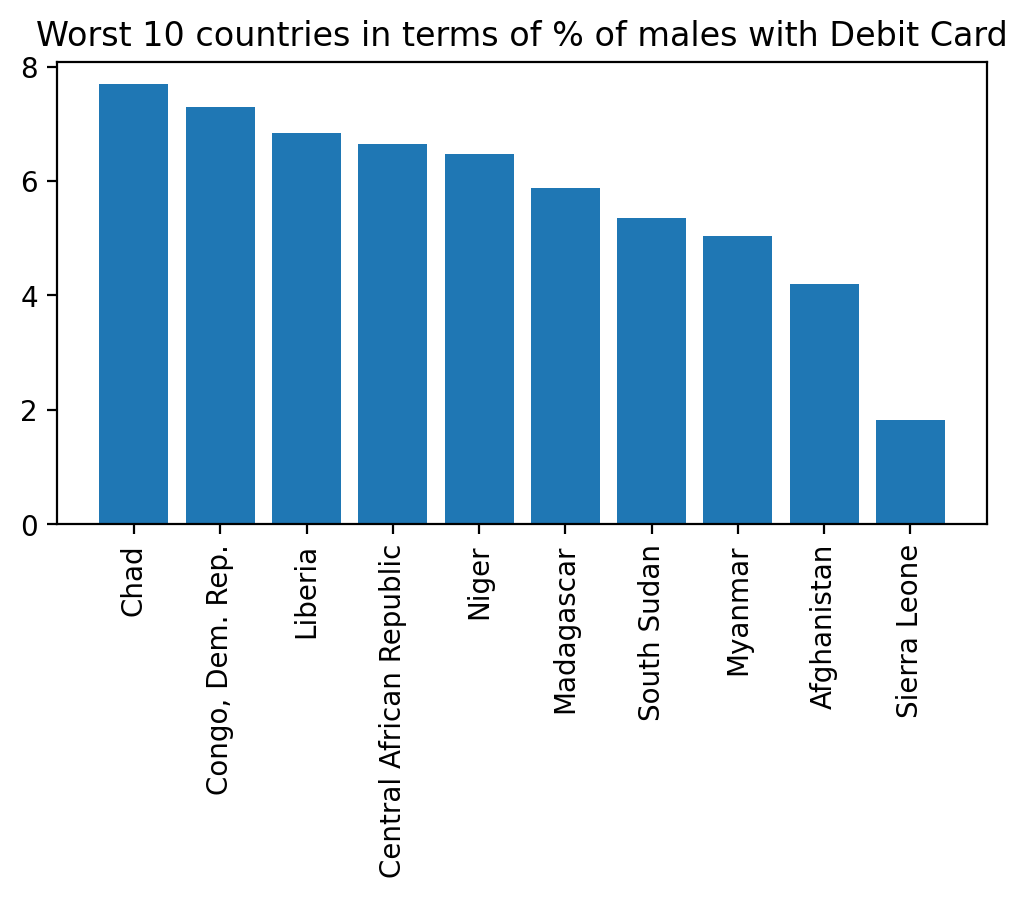

In [21]:
plt.figure(figsize=(6,3)  , dpi=200)
plt.bar(
    male_worst_10['economy'],
    male_worst_10['percent of males with debit card']
)
plt.title("Worst 10 countries in terms of % of males with Debit Card")
plt.xticks(rotation=90)
plt.show()

## DIFFICULT. Create a bubble map to show % of females with debit card per country. Create another showing % of males with debit card per country.

Notice any difference?

In [22]:
# Build the bubble map
fig = px.scatter_geo(
    female_grouped_data, 
    locations="economycode", 
    color="regionwb",
    hover_name="economy", 
    size="percent of females with debit card",
    projection="natural earth"
    )

# Show the figure
fig.show()

In [23]:
# Build the bubble map
fig = px.scatter_geo(
    male_grouped_data, 
    locations="economycode", 
    color="regionwb",
    hover_name="economy", 
    size="percent of males with debit card",
    projection="natural earth"
    )

# Show the figure
fig.show()

In [3]:
# Build the bubble map
fig = px.scatter_geo(
    male_grouped_data, 
    locations="economycode", 
    color="regionwb",
    hover_name="economy", 
    size="percent of males with debit card",
    projection="natural earth"
    )

# Show the figure
fig.show()

NameError: name 'male_grouped_data' is not defined